In [1]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set visualization style
sns.set(style="whitegrid")

# Load data
data = pd.read_csv("/home/behouba/Desktop/polymtl/releaseEngLOG6307E/assignements/msr_2025/msr_2025/data/dependency_data.csv")

# Convert Unix timestamps in the Release_Date column to datetime
data['Release_Date'] = pd.to_datetime(data['Release_Date'], unit='ms')

# Inspect the first few rows to confirm data is loaded correctly
data.head()

,Library,Version,Release_Date,Dependency_Count
0,HTTPClient:HTTPClient,0.3-3,2005-08-01 09:17:55,0
1,abbot:abbot,0.12.3,2005-08-01 09:17:56,0
2,abbot:abbot,0.13.0,2005-08-01 09:17:57,0
3,abbot:abbot,1.4.0,2015-09-22 15:54:01,1
4,abbot:costello,1.4.0,2015-09-24 09:21:46,6


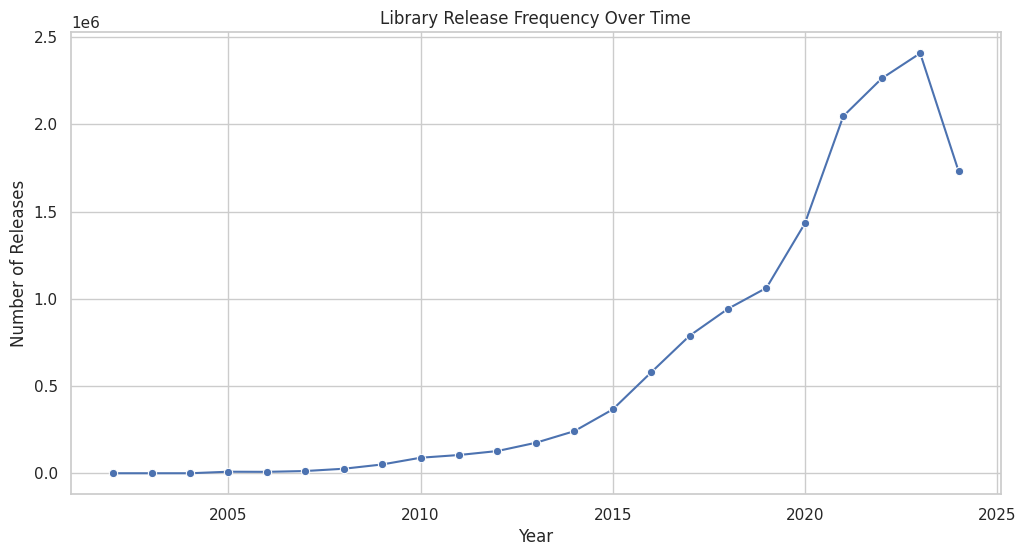

In [2]:
# Extract the year from each release date
data['Year'] = data['Release_Date'].dt.year

# Count releases per year
yearly_releases = data.groupby('Year').size()

# Plot the release count by year
plt.figure(figsize=(12, 6))
sns.lineplot(x=yearly_releases.index, y=yearly_releases.values, marker='o')
plt.title('Library Release Frequency Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.grid(True)
plt.show()


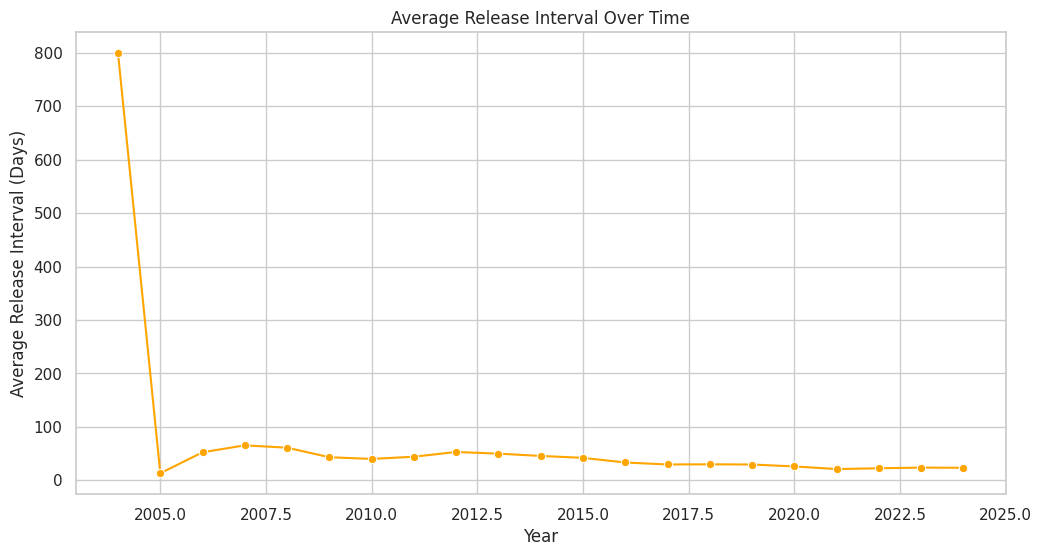

In [3]:
# Sort data by library and release date for interval calculations
data = data.sort_values(by=['Library', 'Release_Date'])

# Calculate release interval (in days) for each library's consecutive releases
data['Release_Interval_Days'] = data.groupby('Library')['Release_Date'].diff().dt.days

# Filter out rows with NaN intervals (first release of each library)
intervals = data.dropna(subset=['Release_Interval_Days'])

# Plot average release interval over time to observe any trends
avg_interval_per_year = intervals.groupby('Year')['Release_Interval_Days'].mean()

plt.figure(figsize=(12, 6))
sns.lineplot(x=avg_interval_per_year.index, y=avg_interval_per_year.values, marker='o', color='orange')
plt.title('Average Release Interval Over Time')
plt.xlabel('Year')
plt.ylabel('Average Release Interval (Days)')
plt.grid(True)
plt.show()